In [1]:
# transport_analysis.ipynb

import pandas as pd

# Load the dataset
df = pd.read_csv("../data/transportcost.csv")

# Display first 5 rows
df.head()


,Date,Start Time,From,To,Mode,Cost (₹),Travel Time (min),Wait Time (min),Distance (km),Weather
0,01-07-2025,8:00 AM,Home,College,Metro,31,29,7,16.67,Clear
1,01-07-2025,6:30 AM,Home,College,Bus,16,40,11,6.42,Rainy
2,01-07-2025,9:15 AM,Home,College,Uber,153,21,3,18.50,Humid
3,01-07-2025,10:45 AM,Home,College,Ola,91,21,5,15.31,Cloudy
4,01-07-2025,8:45 AM,College,Library,Metro,36,31,5,7.65,Sunny


In [2]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Column names
print("Column Names:", df.columns.tolist())

# Data types and nulls
df.info()

# Summary statistics
df.describe()


Shape of the dataset: (1000, 10)
Column Names: ['Date', 'Start Time', 'From', 'To', 'Mode', 'Cost (₹)', 'Travel Time (min)', 'Wait Time (min)', 'Distance (km)', 'Weather']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1000 non-null   object 
 1   Start Time         1000 non-null   object 
 2   From               1000 non-null   object 
 3   To                 1000 non-null   object 
 4   Mode               1000 non-null   object 
 5   Cost (₹)           1000 non-null   int64  
 6   Travel Time (min)  1000 non-null   int64  
 7   Wait Time (min)    1000 non-null   int64  
 8   Distance (km)      1000 non-null   float64
 9   Weather            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


,Cost (₹),Travel Time (min),Wait Time (min),Distance (km)
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,72.746000,27.847000,6.10200,12.827410
std,49.967832,6.072105,3.03658,4.345963
min,10.000000,18.000000,2.00000,5.010000
25%,25.000000,23.000000,4.00000,9.150000
50%,60.000000,27.000000,6.00000,12.920000
75%,121.000000,31.000000,7.00000,16.572500
max,160.000000,45.000000,15.00000,19.960000


In [3]:
# Check missing values
df.isnull().sum()


Date                 0
Start Time           0
From                 0
To                   0
Mode                 0
Cost (₹)             0
Travel Time (min)    0
Wait Time (min)      0
Distance (km)        0
Weather              0
dtype: int64

In [4]:
# Unique transport modes
print("Transport Modes:", df['Mode'].unique())

# Unique routes
print("From:", df['From'].unique())
print("To:", df['To'].unique())

# Unique weather types
if 'Weather' in df.columns:
    print("Weather Types:", df['Weather'].unique())

# Unique date range
print("Date Range:", df['Date'].min(), "to", df['Date'].max())


Transport Modes: ['Metro' 'Bus' 'Uber' 'Ola']
From: ['Home' 'College' 'Office' 'Station']
To: ['College' 'Library' 'Gym' 'Mall' 'Airport']
Weather Types: ['Clear' 'Rainy' 'Humid' 'Cloudy' 'Sunny']
Date Range: 01-07-2025 to 31-07-2025


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dtypes


Date                 datetime64[ns]
Start Time                   object
From                         object
To                           object
Mode                         object
Cost (₹)                      int64
Travel Time (min)             int64
Wait Time (min)               int64
Distance (km)               float64
Weather                      object
dtype: object

In [7]:
df.columns = df.columns.str.strip()
df['Mode'] = df['Mode'].str.strip().str.title()
df['From'] = df['From'].str.strip().str.title()
df['To'] = df['To'].str.strip().str.title()


In [8]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [9]:
# Display missing values
df.isnull().sum()


Date                 0
Start Time           0
From                 0
To                   0
Mode                 0
Cost (₹)             0
Travel Time (min)    0
Wait Time (min)      0
Distance (km)        0
Weather              0
dtype: int64

In [10]:
df.dropna(inplace=True)


In [12]:
print(df.columns)


Index(['Date', 'Start Time', 'From', 'To', 'Mode', 'Cost (₹)',
       'Travel Time (min)', 'Wait Time (min)', 'Distance (km)', 'Weather'],
      dtype='object')


In [13]:
df.rename(columns={
    'Transport Cost': 'Cost',
    'Distance (km)': 'Distance_km'
}, inplace=True)


In [15]:
print(df.columns.tolist())


['Date', 'Start Time', 'From', 'To', 'Mode', 'Cost (₹)', 'Travel Time (min)', 'Wait Time (min)', 'Distance_km', 'Weather']


In [16]:
df.rename(columns={'Cost (₹)': 'Cost'}, inplace=True)


In [17]:
print(df.columns.tolist())


['Date', 'Start Time', 'From', 'To', 'Mode', 'Cost', 'Travel Time (min)', 'Wait Time (min)', 'Distance_km', 'Weather']


In [18]:
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Distance_km'] = pd.to_numeric(df['Distance_km'], errors='coerce')


C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1591338022.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Mode', y='Cost', estimator='mean', ci=None, palette='viridis')
C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1591338022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Mode', y='Cost', estimator='mean', ci=None, palette='viridis')


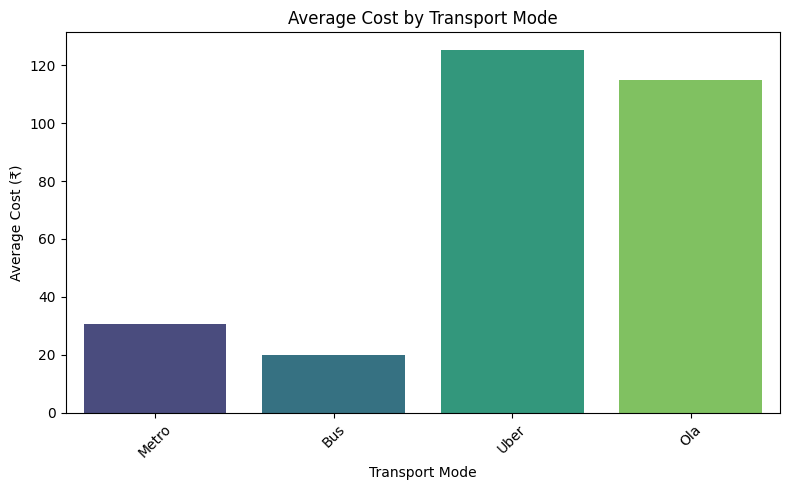

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Mode', y='Cost', estimator='mean', ci=None, palette='viridis')
plt.title('Average Cost by Transport Mode')
plt.ylabel('Average Cost (₹)')
plt.xlabel('Transport Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_cost_by_mode.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1795985108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Mode', y='Travel Time (min)', estimator='mean', ci=None, palette='mako')
C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1795985108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Mode', y='Travel Time (min)', estimator='mean', ci=None, palette='mako')


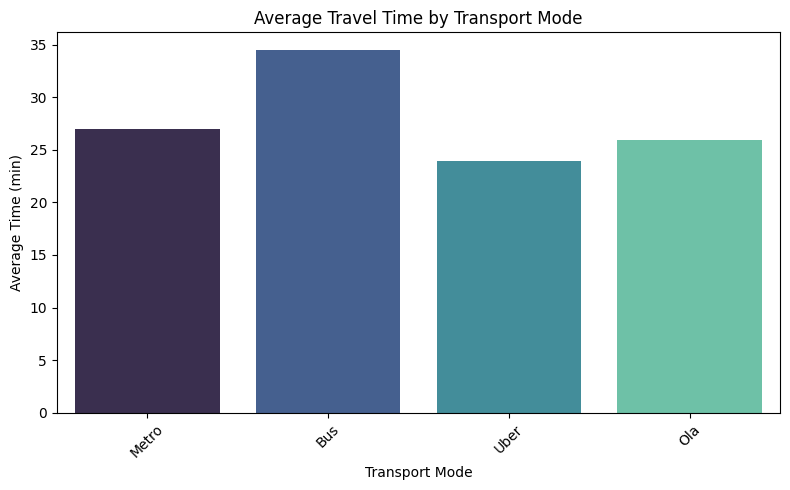

C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1795985108.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='From', y='Cost', estimator='mean', ci=None, palette='coolwarm')
C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\1795985108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='From', y='Cost', estimator='mean', ci=None, palette='coolwarm')


Text(0.5, 1.0, 'Average Cost by Origin')

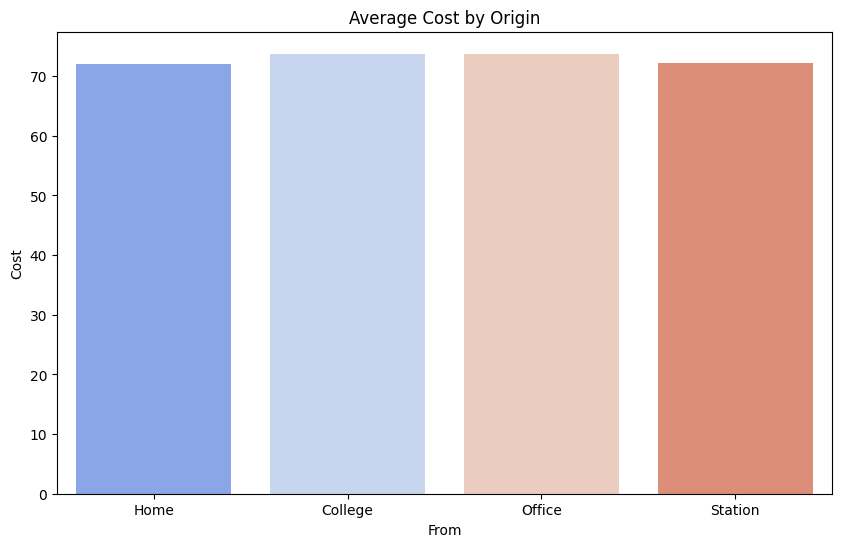

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Mode', y='Travel Time (min)', estimator='mean', ci=None, palette='mako')
plt.title('Average Travel Time by Transport Mode')
plt.ylabel('Average Time (min)')
plt.xlabel('Transport Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='From', y='Cost', estimator='mean', ci=None, palette='coolwarm')
plt.savefig('avg_travel_time_by_mode.png', dpi=300, bbox_inches='tight')
plt.title('Average Cost by Origin')

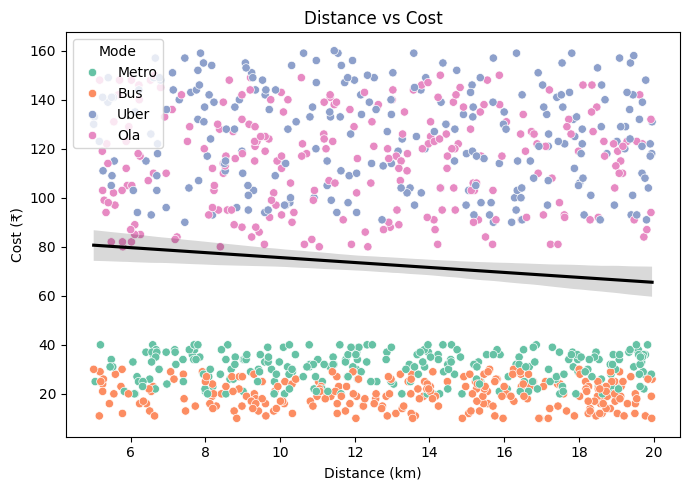

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Distance_km', y='Cost', hue='Mode', palette='Set2')
sns.regplot(data=df, x='Distance_km', y='Cost', scatter=False, color='black')
plt.title('Distance vs Cost')
plt.xlabel('Distance (km)')
plt.ylabel('Cost (₹)')
plt.tight_layout()
plt.savefig('cost_distribution_by_mode.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\prabhjot singh\AppData\Local\Temp\ipykernel_18620\3065181976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather', y='Cost', palette='coolwarm')


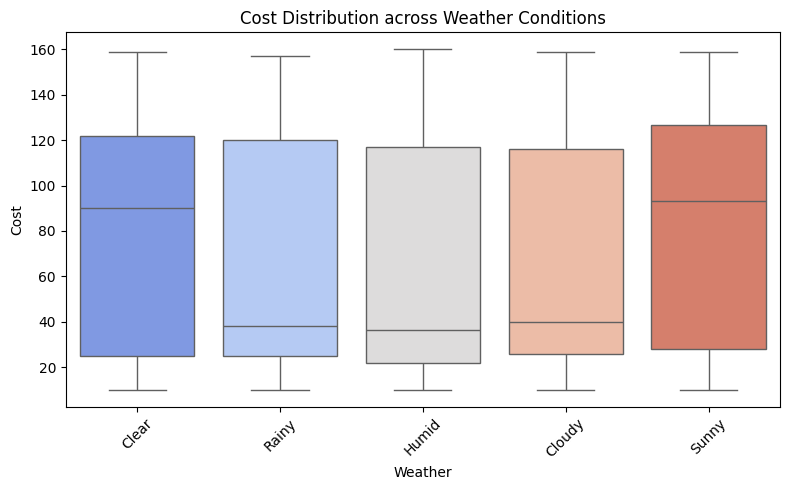

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Weather', y='Cost', palette='coolwarm')
plt.title('Cost Distribution across Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('travel_time_distribution_by_mode.png', dpi=300, bbox_inches='tight')
plt.show()
